In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
cars = pd.read_csv("germany-cars-zenrows.csv")

In [55]:
cars

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [56]:
from scipy import stats 
 
cars = cars.dropna() 
cars = cars[stats.zscore(cars.price) < 3] 
cars = cars[stats.zscore(cars.hp) < 3] 
cars = cars[stats.zscore(cars.mileage) < 3] 

In [57]:
cars

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


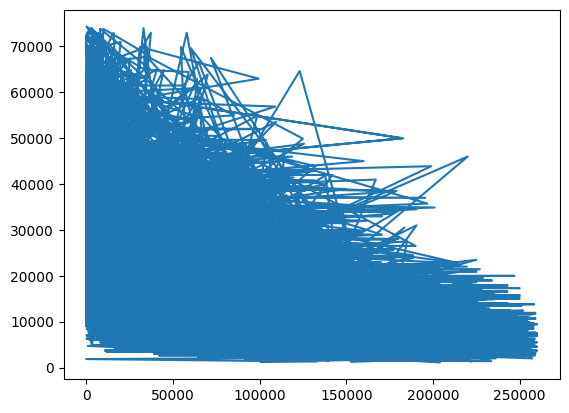

In [58]:
plt.plot(cars['mileage'],cars['price'])
plt.show()

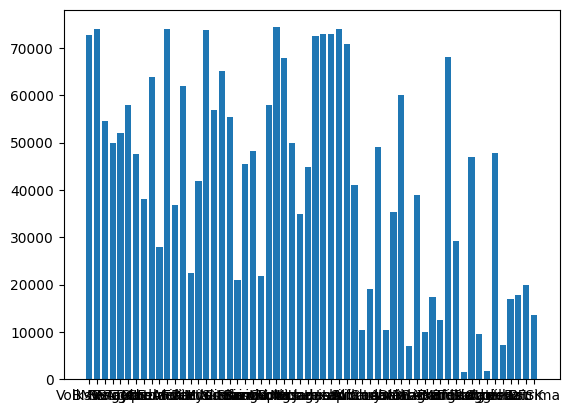

In [59]:
plt.bar(cars['make'],cars['price'])
plt.show()

In [60]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44138 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    44138 non-null  int64  
 1   make       44138 non-null  object 
 2   model      44138 non-null  object 
 3   fuel       44138 non-null  object 
 4   gear       44138 non-null  object 
 5   offerType  44138 non-null  object 
 6   price      44138 non-null  int64  
 7   hp         44138 non-null  float64
 8   year       44138 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


In [61]:
cars['make'].describe()

count          44138
unique            58
top       Volkswagen
freq            6757
Name: make, dtype: object

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
del cars['mileage']

In [64]:
del cars['make']

In [65]:
del cars['model']

In [66]:
cars['fuel'].value_counts()

fuel
Gasoline             27707
Diesel               14451
Electric/Gasoline     1027
Electric               607
LPG                    117
CNG                    112
Electric/Diesel         47
Others                  47
-/- (Fuel)              20
Ethanol                  2
Hydrogen                 1
Name: count, dtype: int64

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
tfv = TfidfVectorizer()

In [69]:
tfv_matrix = tfv.fit_transform(cars['fuel'])

In [70]:
print(tfv_matrix)

  (0, 1)	1.0
  (1, 5)	1.0
  (2, 5)	1.0
  (3, 5)	1.0
  (4, 5)	1.0
  (5, 2)	0.9482307341586452
  (5, 5)	0.31758223312546424
  (6, 1)	1.0
  (7, 5)	1.0
  (8, 5)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 5)	1.0
  (12, 5)	1.0
  (13, 1)	1.0
  (14, 5)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 5)	1.0
  (19, 5)	1.0
  (20, 5)	1.0
  (21, 5)	1.0
  (22, 1)	1.0
  (23, 5)	1.0
  :	:
  (44122, 5)	1.0
  (44123, 5)	1.0
  (44124, 5)	1.0
  (44125, 2)	0.9482307341586452
  (44125, 5)	0.31758223312546424
  (44126, 5)	1.0
  (44127, 5)	1.0
  (44128, 5)	1.0
  (44129, 2)	0.9482307341586452
  (44129, 5)	0.31758223312546424
  (44130, 2)	0.9482307341586452
  (44130, 5)	0.31758223312546424
  (44131, 2)	0.9482307341586452
  (44131, 5)	0.31758223312546424
  (44132, 5)	1.0
  (44133, 2)	0.9482307341586452
  (44133, 5)	0.31758223312546424
  (44134, 2)	0.9482307341586452
  (44134, 5)	0.31758223312546424
  (44135, 2)	0.9482307341586452
  (44135, 5)	0.31758223312546424
  (44136, 2)	0.9482307341586452
  (44136, 5)	0.317

In [71]:
cars['fuel'].replace('Gasoline',0,inplace=True)

In [72]:
cars['fuel'].replace('Diesel',1,inplace=True)

In [73]:
cars['fuel'].replace('Electric/Gasoline',2,inplace=True)

In [74]:
cars['fuel'].replace('Electric',3,inplace=True)

In [75]:
cars['fuel'].replace('LPG',4,inplace=True)

In [76]:
cars['fuel'].replace('CNG',5,inplace=True)

In [77]:
cars['fuel'].replace('Electric/Diesel',6,inplace=True)

In [78]:
cars['fuel'].replace('Others',7,inplace=True)

In [79]:
cars['fuel'].replace('-/- (Fuel)',8,inplace=True)

In [80]:
cars['fuel'].replace('Ethanol',9,inplace=True)

In [81]:
cars['fuel'].replace('Hydrogen',9,inplace=True)

In [82]:
cars.head()

,fuel,gear,offerType,price,hp,year
0,1,Manual,Used,6800,116.0,2011
1,0,Manual,Used,6877,122.0,2011
2,0,Manual,Used,6900,160.0,2011
3,0,Manual,Used,6950,110.0,2011
4,0,Manual,Used,6950,156.0,2011


In [83]:
cars['gear'].value_counts()

gear
Manual            30030
Automatic         14054
Semi-automatic       54
Name: count, dtype: int64

In [84]:
cars['gear'].replace('Manual',1,inplace=True)

In [85]:
cars['gear'].replace('Automatic',2,inplace=True)

In [86]:
cars['gear'].replace('Semi-automatic',3,inplace=True)

In [87]:
cars.head()

,fuel,gear,offerType,price,hp,year
0,1,1,Used,6800,116.0,2011
1,0,1,Used,6877,122.0,2011
2,0,1,Used,6900,160.0,2011
3,0,1,Used,6950,110.0,2011
4,0,1,Used,6950,156.0,2011


In [88]:
cars['offerType'].value_counts()

offerType
Used              38221
Pre-registered     2744
Demonstration      2106
Employee's car     1057
New                  10
Name: count, dtype: int64

In [89]:
cars['offerType'].replace('Used',1,inplace=True)
cars['offerType'].replace('Pre-registered',2,inplace=True)
cars['offerType'].replace('Demonstration',3,inplace=True)
cars['offerType'].replace("Employee's car",4,inplace=True)

In [90]:
cars['offerType'].replace('New',5,inplace=True)

In [91]:
cars['offerType'].value_counts()

offerType
1    38221
2     2744
3     2106
4     1057
5       10
Name: count, dtype: int64

In [92]:
cars.head()

,fuel,gear,offerType,price,hp,year
0,1,1,1,6800,116.0,2011
1,0,1,1,6877,122.0,2011
2,0,1,1,6900,160.0,2011
3,0,1,1,6950,110.0,2011
4,0,1,1,6950,156.0,2011


In [113]:
x = cars.drop(['price'],axis=1)
print(x)
y = cars['price']
print(y)

       fuel  gear  offerType     hp  year
0         1     1          1  116.0  2011
1         0     1          1  122.0  2011
2         0     1          1  160.0  2011
3         0     1          1  110.0  2011
4         0     1          1  156.0  2011
...     ...   ...        ...    ...   ...
46400     2     1          2   71.0  2021
46401     2     1          2   71.0  2021
46402     2     1          2   71.0  2021
46403     2     1          2   71.0  2021
46404     2     1          2   71.0  2021

[44138 rows x 5 columns]
0         6800
1         6877
2         6900
3         6950
4         6950
         ...  
46400    12990
46401    12990
46402    12990
46403    12990
46404    12990
Name: price, Length: 44138, dtype: int64


In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [115]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [116]:
rfr.fit(x_train,y_train)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestRegressor()

In [117]:
y_pred = rfr.predict(x_test)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [118]:
accuracy = rfr.score(x_test,y_test)
print("Accuracy:",accuracy*100)

Accuracy: 88.15661973609879


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse i

In [122]:
input_data = [2,4,1,121,2001]
input_data_asarray = np.asarray(input_data)
input_data_reshape = input_data_asarray.reshape(1,-1)

In [123]:
prediction = rfr.predict(input_data_reshape)
print(prediction)

[7980.79089878]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
